In [1]:
# %cd /home/baldeeb/Documents/Projects/ContrastiveLearningOfDenseDescriptor
%cd /home/baldeeb/Documents/Projects/dense_descriptors_and_acf/ContrastiveLearningOfDenseDescriptor

%load_ext autoreload
%autoreload 2

/home/baldeeb/Documents/Projects/ContrastiveLearningOfDenseDescriptor


In [2]:
#temp config 
class cfg():
    dataset = 'unreal_parts'
    data_dir = '../simple_data'
    image_type = 'RGB'
    obj_class = 'mug'
    n_pair = 0
    n_nonpair_singleobj = 0 
    n_nonpair_bg = 0
    batch_size = 1
    workers = 1

    device = 'cuda:0'
    # device = 'cpu'

In [3]:
import torch 
from torchvision.models.segmentation import deeplabv3_resnet50

## Load model
file = '/home/baldeeb/Documents/Projects/ContrastiveLearningOfDenseDescriptor/temp/results_old/first_successful_run/model_checkpoints/13_09_2021__11_29_03_19_final'
device = torch.device('cuda:0')
state_dict = torch.load(file, map_location=device)
backbone = deeplabv3_resnet50(num_classes=3).to(device)
backbone.load_state_dict(state_dict['model_state_dict'])

## Load data
from dataset import make_data_loader
dataloader = make_data_loader(split='train', args=cfg())

## Run model
descriptors, images = None, None
for im, batch in dataloader:
    images = im.to(device)
    descriptors = backbone(images)['out']
    break


/home/baldeeb/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


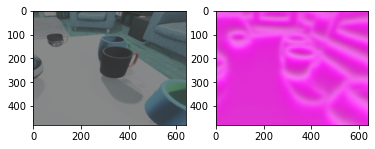

In [4]:
## De-Normalize
data_mean, data_std = [0.5183, 0.5747, 0.7210], [0.3218, 0.3045, 0.2688]  # Unreal Progress Mugs
im = images[0].clone().detach().cpu()
im = im * torch.tensor(data_std).reshape(-1, 1, 1) + torch.tensor(data_mean).reshape(-1, 1, 1)
d = descriptors[0].clone().detach().sigmoid().cpu()

# print(descriptors.min(), descriptors.max(), descriptors.mean(), descriptors.std())

## Visualize
import matplotlib.pyplot as plt
def visualize(image, descriptor):
    fig = plt.figure(); gs = fig.add_gridspec(1, 2); axs = gs.subplots()
    image = image.permute(1,2,0).float()
    descriptor = descriptor.permute(1,2,0).float()
    axs[0].imshow(image)
    axs[1].imshow(descriptor) 
    plt.show()

visualize(im, d)